In [1]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import visualization as vis
import utilities as utils

erge

In [2]:
%%writefile utilities.py
import image_processing as ip
import pandas as pd

def create_dataframe_image(original_image):
  # Define noise parameters


  gaussian_std = [5, 25, 75]
  salt_pepper_probs  = [0.05, 0.25, 0.5]

  # Create lists for DataFrame
  index = []
  noisy_images = []

  index.append('no_noise')
  noisy_images.append(original_image)

  # Apply Gaussian noise with different variances
  for sigma in gaussian_std:
      noisy_img = ip.add_gaussian_noise(original_image, sigma=sigma)
      index.append(f'Gaussian_Noise_sigma_{sigma}')
      noisy_images.append(noisy_img)

  # Apply Salt-and-Pepper noise with different probabilities
  for prob in salt_pepper_probs:
      noisy_img = ip.add_salt_and_pepper_noise(original_image, prob=prob)
      index.append(f'Salt_and_Pepper_prob_{prob}')
      noisy_images.append(noisy_img)

  # Create DataFrame
  df = pd.DataFrame({'Noise_Type': index, 'Image': noisy_images}).set_index('Noise_Type')
  return df

Overwriting utilities.py


In [3]:
list_of_images = []

# Load a dataset (example: MNIST)
dataset = tfds.load('tf_flowers', split='train')

# Iterate over images
for images in dataset.take(5):  # Taking first 10 images for example
    image = images['image']
    # Convert from RGB to Grayscale using OpenCV
    image_gray = cv2.cvtColor(image.numpy(), cv2.COLOR_RGB2GRAY)
    list_of_images.append(image_gray)

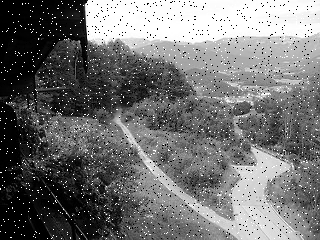

In [6]:
dataframes = []

for image in list_of_images:
    df = utils.create_dataframe_image(image)
    dataframes.append(df)

ex = dataframes[0].loc['Salt_and_Pepper_prob_0.05', 'Image']
cv2_imshow(ex)